<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Comparing Clustering Algorithm Effectiveness

_Authors: Tim Book (DC), Kiefer Katovich (SF)_

---

In this lab, you'll test three of the clustering algorithms we've covered on seven data sets that are specifically designed to evaluate clustering algorithm effectiveness.

This lab is exploratory and heavy on data visualization.


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

plt.style.use('fivethirtyeight')

%matplotlib inline

---

### 1) Load the data sets.

Each of the seven data sets have three columns:

    x
    y
    label
    
Because they each only have two variables, they're easy to examine visually. You’ll compare the “true” labels for the data to the clusters the algorithms find.

In [2]:
flame = pd.read_csv('./datasets/flame.csv')
agg = pd.read_csv('./datasets/aggregation.csv')
comp = pd.read_csv('./datasets/compound.csv')
jain = pd.read_csv('./datasets/jain.csv')
path = pd.read_csv('./datasets/pathbased.csv')
r15 = pd.read_csv('./datasets/r15.csv')
spiral = pd.read_csv('./datasets/spiral.csv')

---

### 2) Plot each of the data sets with colored true labels.

The data sets have different numbers of unique labels, so you'll need to figure out how many there are for each and color the clusters accordingly (for example, `r15` has 15 different clusters).

You might find [this](https://matplotlib.org/examples/color/colormaps_reference.html) help page on colormaps useful!

In [3]:
flame.head()

,x,y,label
0,1.85,27.80,1
1,1.35,26.65,1
2,1.40,23.25,2
3,0.85,23.05,2
4,0.50,22.35,2


In [4]:
# Plotting function.
# Plotting function should take (df, name) as arguments. `name` will be the plot's title.

def plot_clusters(df, name):
    df.plot(kind='scatter', x='x', y='y', c='label', colormap='coolwarm')
    plt.title(name, fontsize=20);

In [5]:
dfs = [
    (flame, 'flame'),
    (agg, 'agg'),
    (comp, 'comp'),
    (jain, 'jain'),
    (path, 'path'),
    (r15, 'r15'),
    (spiral, 'spiral')
]

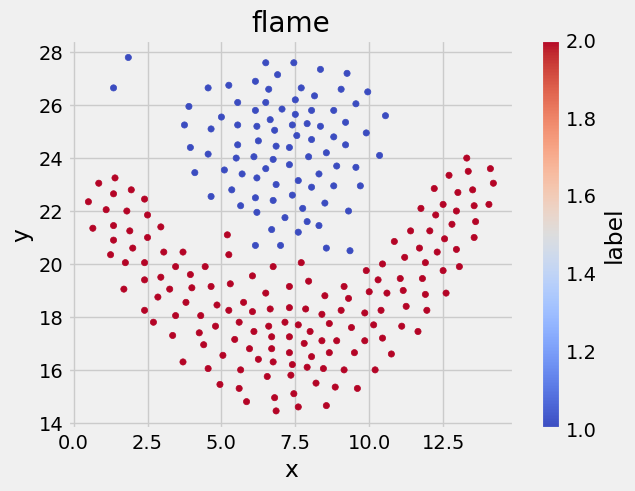

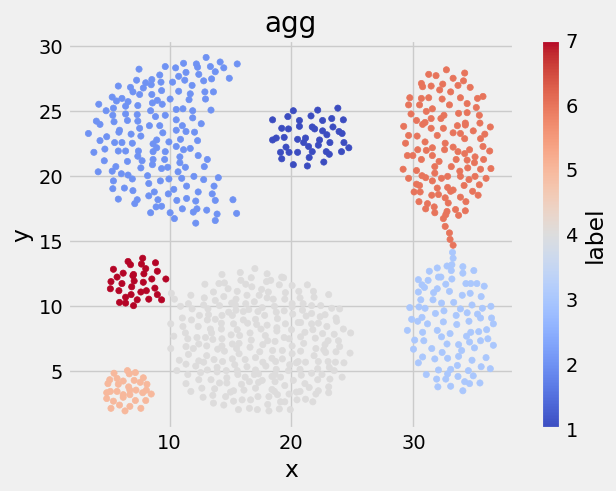

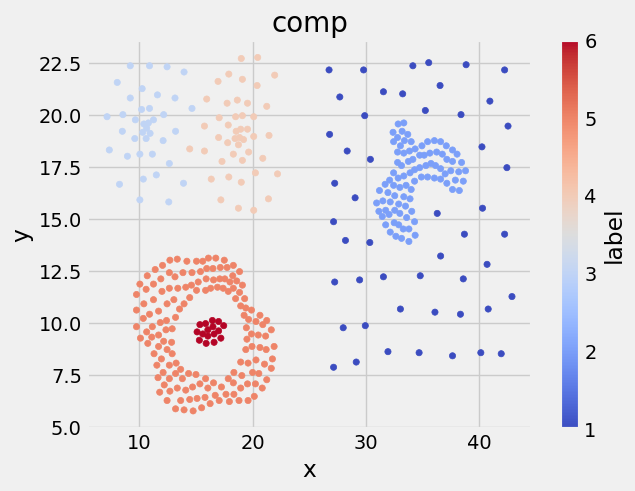

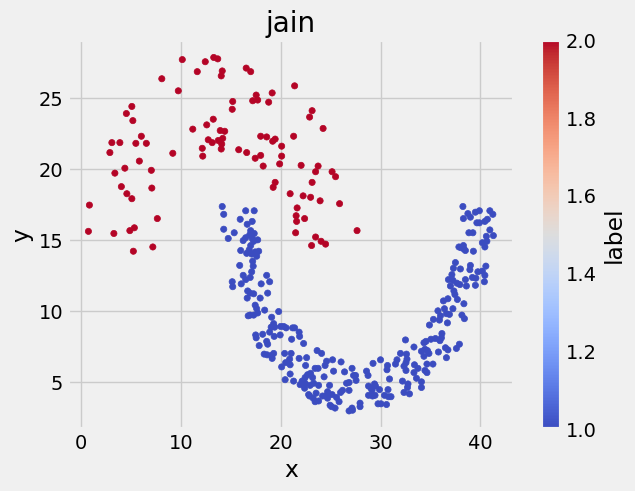

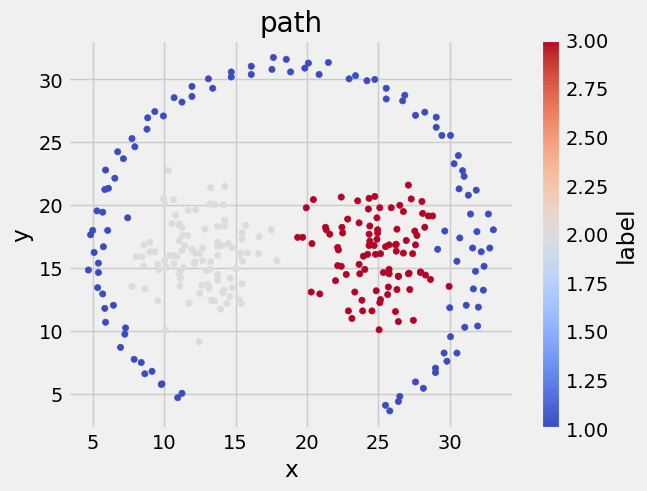

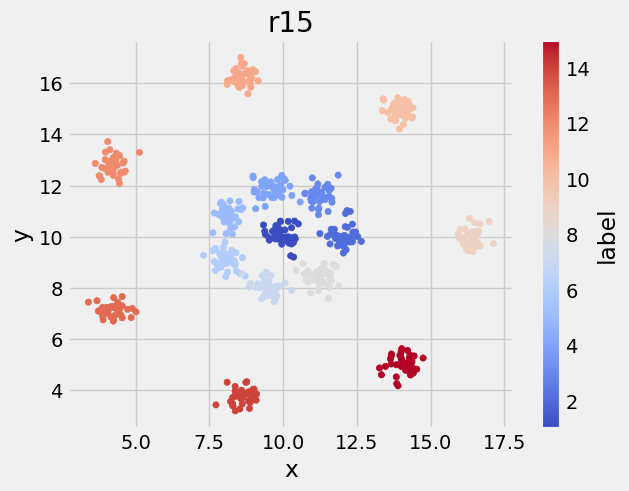

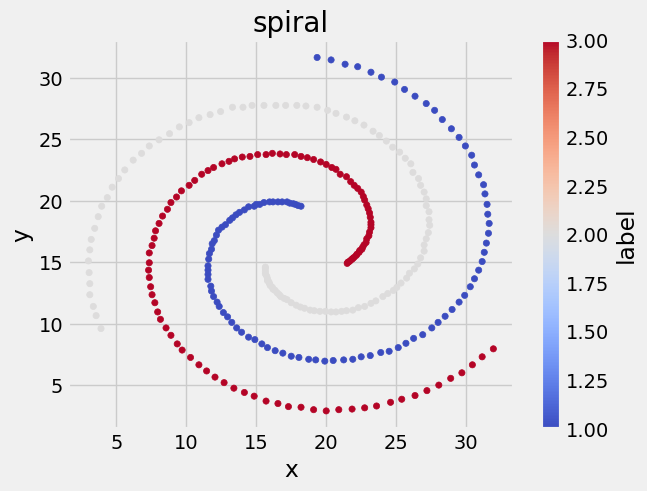

In [6]:
# Plot each data set with the true cluster labels.
[plot_clusters(df, name) for df, name in dfs];

---

### 3) Write a plotting function (or functions) to compare the performance of the three clustering algorithms.

Load in the three clustering algorithms we covered earlier in the class.

    K-means: k-means clustering.
    Agglomerative clustering: hierarchical clustering (bottom up).
    DBSCAN: density-based clustering.
    
Your function(s) should allow you to visually examine the effects of changing different parameters in the clustering algorithms. The parameters you should explore, at minimum, are:

    K-means:
        n_clusters
    Agglomerative clustering:
        n_clusters
    DBSCAN
        eps
        min_samples
        
Feel free to explore other parameters for these models.


In [7]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

### But first: Let's write a function that scales our data for us.
Why do we need to scale our data for clustering algorithms? (thread)

In [8]:
# Write your function to scale data here.
def scale_matrix(X):
    sc = StandardScaler()
    return sc.fit_transform(X)

In [9]:
# Write a function that will plot the results of the three
# clustering algorithms for comparison.

# Your function should take TWO INPUTS:
# 1 - The data
# 2 - The clusterer

# Your function should do TWO THINGS:
# 1 - Print the SILHOUETTE SCORE for your clusters
# 2 - Plot the clusteres with appropriate coloring

def plot_results(df, cl):
    X = df[['x', 'y']]
    # Scale data
    X_sc = scale_matrix(X)
    # Fit clusterer
    cl.fit(X_sc)
    df['cluster'] = cl.labels_
    # Print Silhouette Score
    sil = silhouette_score(X_sc, cl.labels_)
    print(f"Silhouette Score = {sil}")
    # Plot
    df.plot(kind='scatter', x='x', y='y', c='cluster', colormap='PiYG')

## 4) Tinkering with clustering parameters.

In the following sections, look at how the parameters affect the clustering algorithms and try to get clusters that make sense. There is no right answer here, as these are unsupervised techniques.

Don't forget to check out **silhouette scores!**

### 4.A) Find good parameters for the `flame` data set.

Which algorithm (visually) performs best?

Answer: kmeans

Silhouette Score = 0.36935102648748214


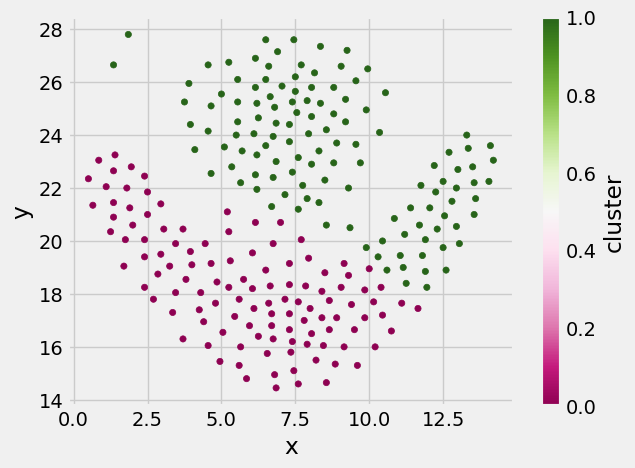

In [10]:
# kmeans, flame
cl = KMeans(n_clusters=2)
plot_results(flame, cl)

Silhouette Score = 0.3524942517997597


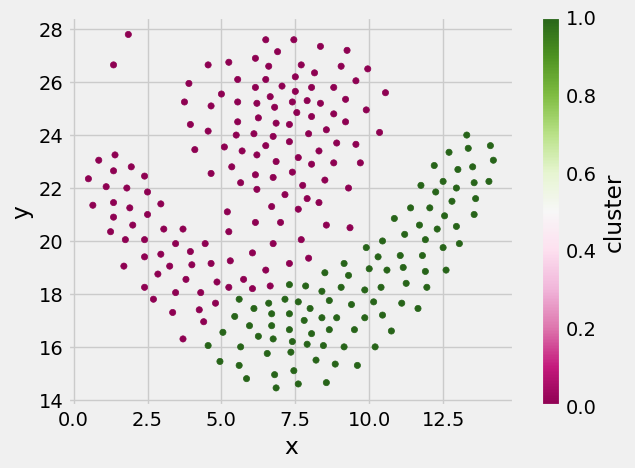

In [11]:
# AgglomerativeClustering, flame
cl = AgglomerativeClustering(n_clusters=2)
plot_results(flame, cl)

Silhouette Score = 0.20771408489920248


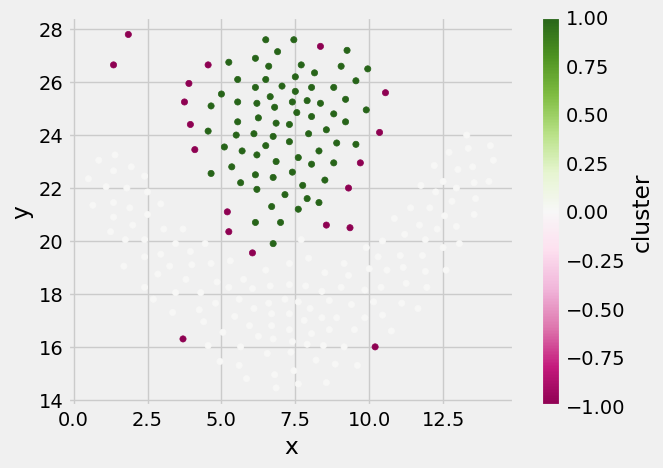

In [12]:
# DBSCAN, flame
cl = DBSCAN(eps=0.25, min_samples=4)
plot_results(flame, cl)

---

### 4.B) Find good parameters for the `agg` data set.

Which algorithm (visually) performs best?

Answer: kmeans

Silhouette Score = 0.43333135165224673


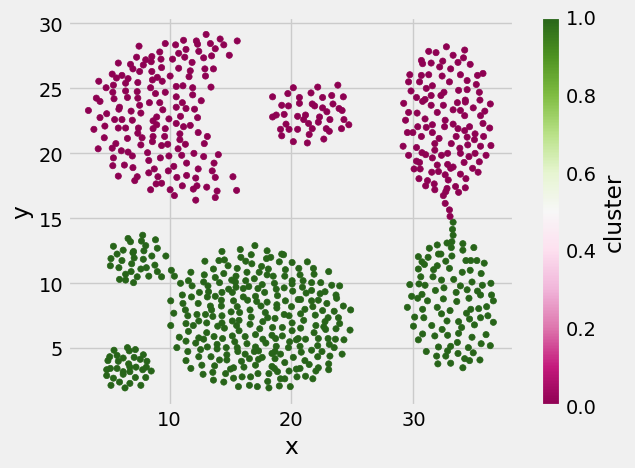

In [13]:
# kmeans, agg
cl = KMeans(n_clusters=2)
plot_results(agg, cl)

Silhouette Score = 0.5361425457357981


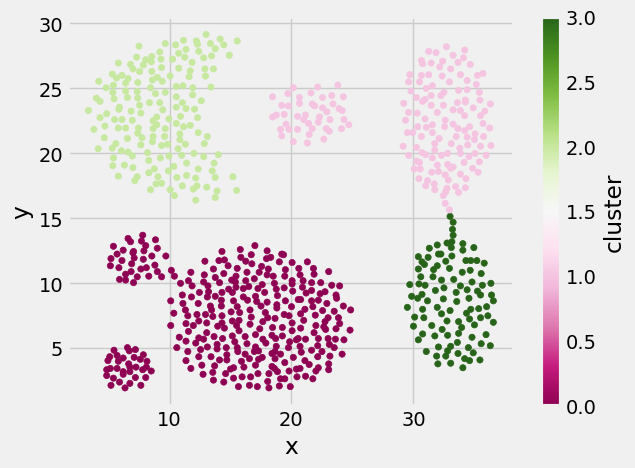

In [14]:
# AgglomerativeClustering, agg
cl = AgglomerativeClustering(n_clusters=4)
plot_results(agg, cl)

Silhouette Score = 0.3813508476773287


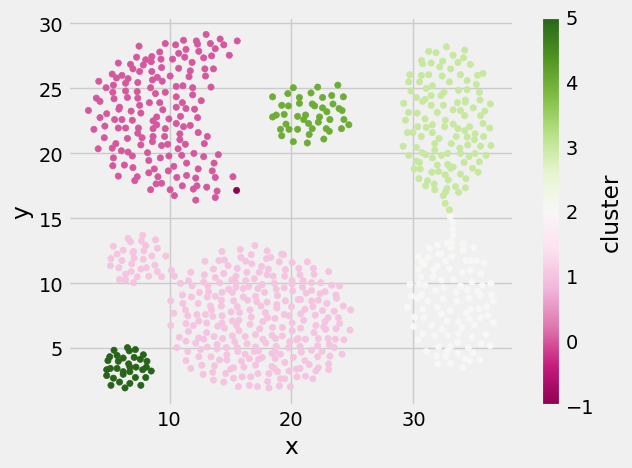

In [15]:
# DBSCAN, agg
cl = DBSCAN(eps=0.15, min_samples=6)
plot_results(agg, cl)

---

### 4.C) Find good parameters for the `comp` data set.

Which algorithm (visually) performs best?

Answer: DBSCAN

Silhouette Score = 0.49214704553480115


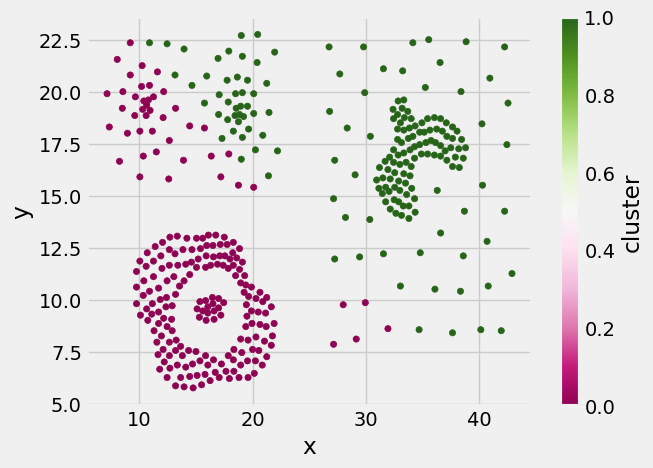

In [16]:
# kmeans, comp
cl = KMeans(n_clusters=2)
plot_results(comp, cl)

Silhouette Score = 0.4931116987658661


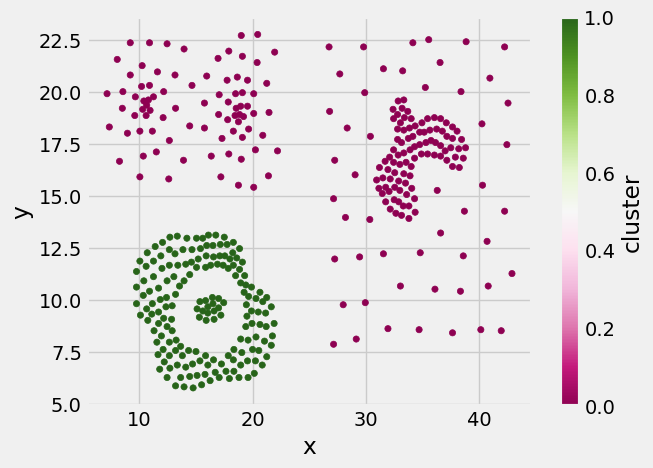

In [17]:
# AgglomerativeClustering, comp
cl = AgglomerativeClustering(n_clusters=2)
plot_results(comp, cl)

Silhouette Score = 0.5243743038650605


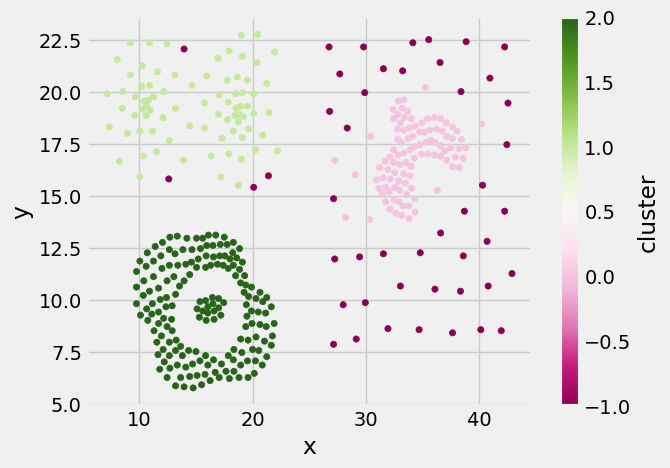

In [18]:
# DBSCAN, comp
cl = DBSCAN(eps=0.25, min_samples=4)
plot_results(comp, cl)

---

### 4.D) Find good parameters for the `jain` data set.

Which algorithm (visually) performs best?

Answer: AgglomerativeClustering

Silhouette Score = 0.5044779516212523


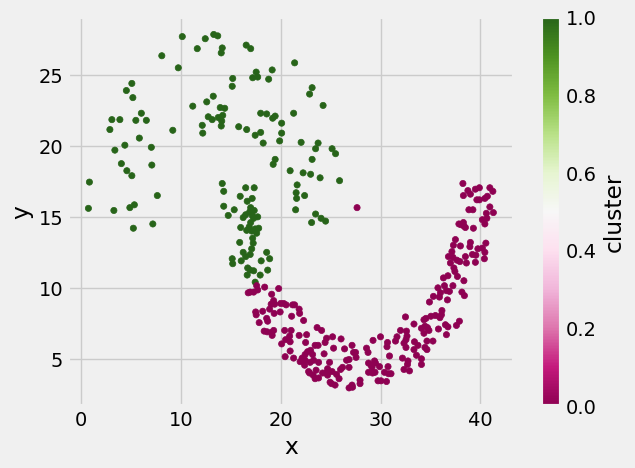

In [19]:
# kmeans, jain
cl = KMeans(n_clusters=2)
plot_results(jain, cl)

Silhouette Score = 0.5042663862106481


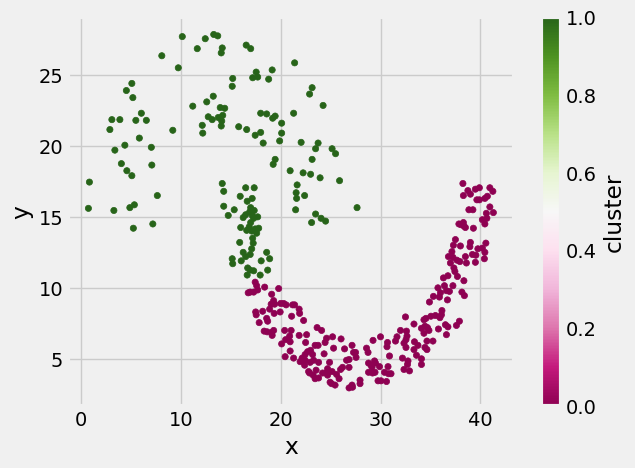

In [20]:
# AgglomerativeClustering, jain
cl = AgglomerativeClustering(n_clusters=2)
plot_results(jain, cl)

Silhouette Score = 0.2752220786801804


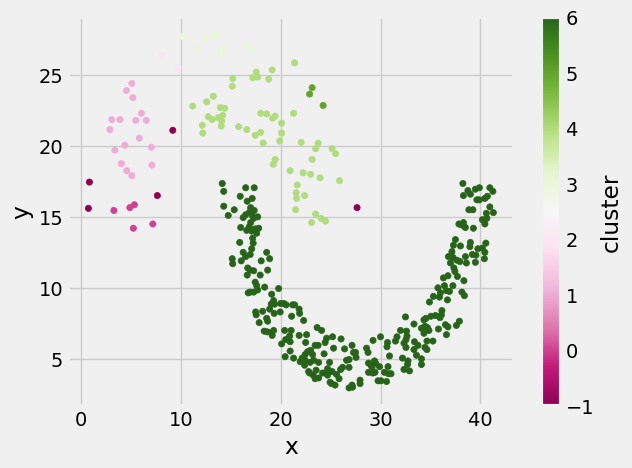

In [21]:
# DBSCAN, jain
cl = DBSCAN(eps=0.25, min_samples=2)
plot_results(jain, cl)

---

### 4.E) Find good parameters for the `pathbased` data set.

Which algorithm (visually) performs best?

Answer: kmeans

Silhouette Score = 0.3997773470411237


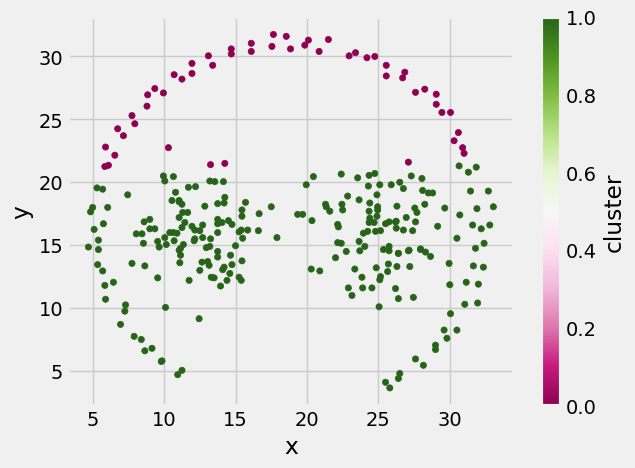

In [22]:
# kmeans, pathbased
cl = KMeans(n_clusters=2)
plot_results(path, cl)

Silhouette Score = 0.4247841109067529


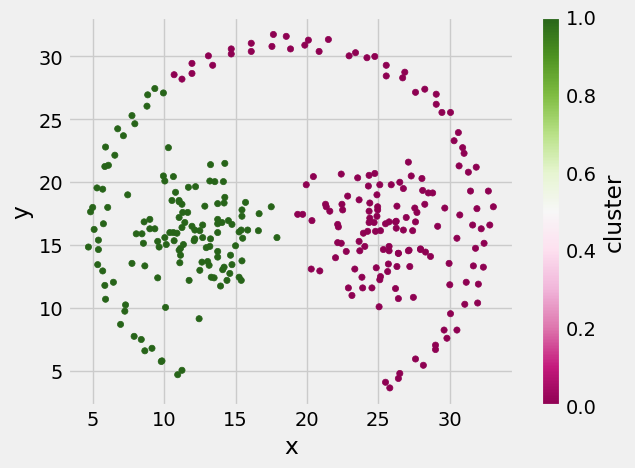

In [23]:
# AgglomerativeClustering, pathbased
cl = AgglomerativeClustering(n_clusters=2)
plot_results(path, cl)

Silhouette Score = 0.127757428958515


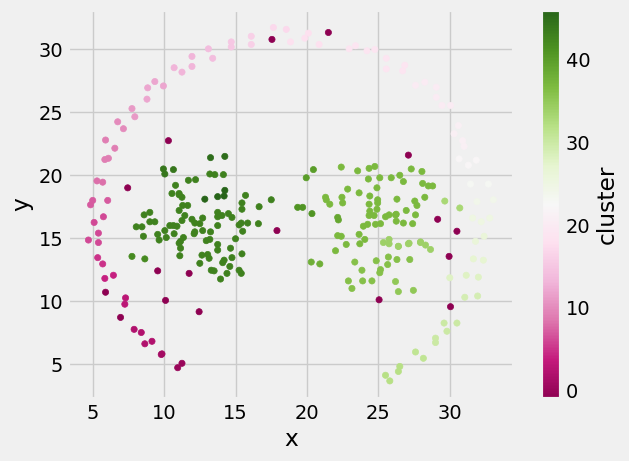

In [24]:
# DBSCAN, pathbased
cl = DBSCAN(eps=0.16, min_samples=2)
plot_results(path, cl)

---

### 4.F) Find good parameters for the `r15` data set.

Which algorithm (visually) performs best?

Answer: Around the same performance for all three

Silhouette Score = 0.530178375960791


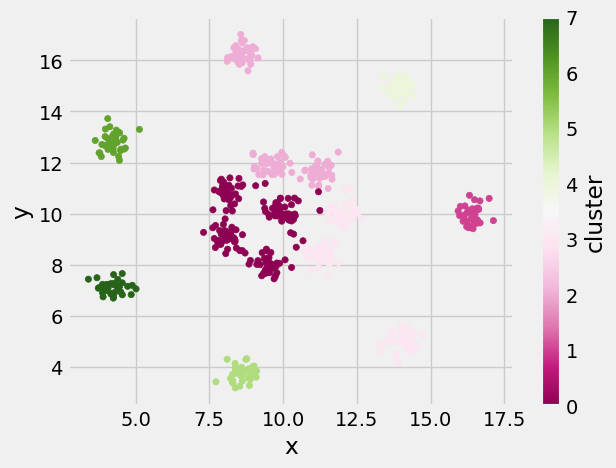

In [25]:
# kmeans, r15
cl = KMeans(n_clusters=8)
plot_results(r15, cl)

Silhouette Score = 0.653006125666107


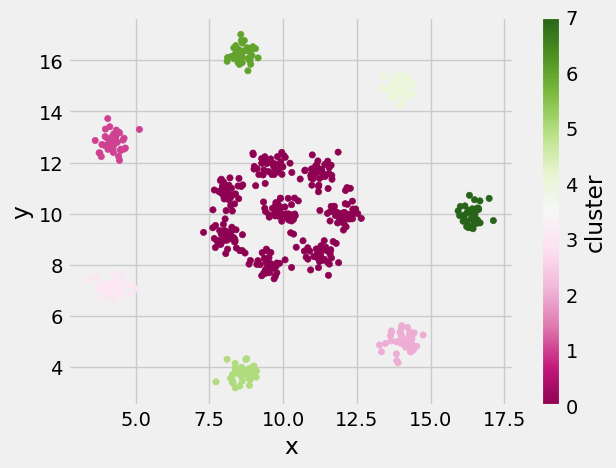

In [26]:
# AgglomerativeClustering, r15
cl = AgglomerativeClustering(n_clusters=8)
plot_results(r15, cl)

Silhouette Score = 0.653006125666107


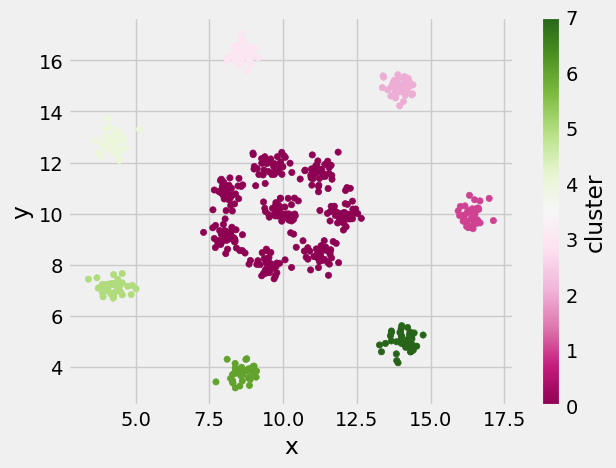

In [27]:
# DBSCAN, r15
cl = DBSCAN(eps=0.25, min_samples=4)
plot_results(r15, cl)

---

### 4.G) Find good parameters for the `spiral` data set.

Which algorithm (visually) performs best?

Answer: DBSCAN

Silhouette Score = 0.43333135165224673


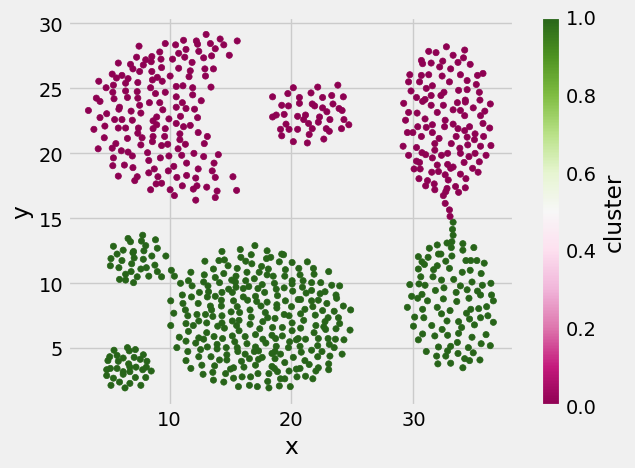

In [28]:
# kmeans, agg
cl = KMeans(n_clusters=2)
plot_results(agg, cl)

Silhouette Score = 0.4165350233713828


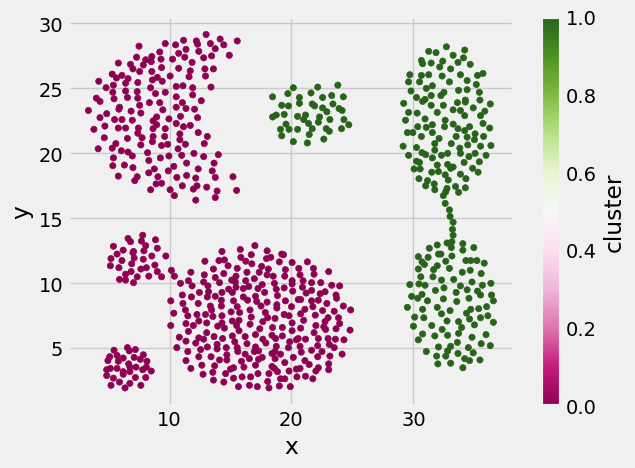

In [29]:
# AgglomerativeClustering, agg
cl = AgglomerativeClustering(n_clusters=2)
plot_results(agg, cl)

Silhouette Score = 0.4488863176654282


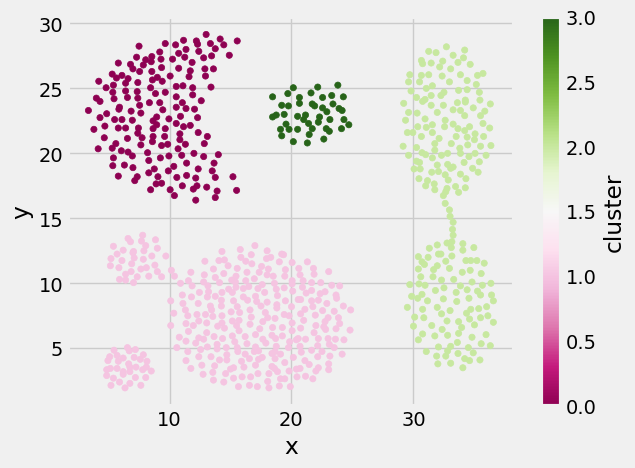

In [30]:
# DBSCAN, agg
cl = DBSCAN(eps=0.4, min_samples=4)
plot_results(agg, cl)

## 5) Melbourne Housing
Data come from [this](https://www.kaggle.com/anthonypino/melbourne-housing-market) Kaggle page.

In [31]:
mel = pd.read_csv('datasets/melbourne.csv')
mel.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


### 5a) Fix bad variable names
We're only going to look at three variables here, and two of them are spelled wrong! Change the lat/long column names to either be spelled correctly or abbrevited as `lat`/`long`. While we're add it, let's change `Price` --> `price`.

In [32]:
mel.rename(columns={
    'Longtitude': 'long',
    'Lattitude': 'lat',
    'Price': 'price'
}, inplace=True)

### 5b) Drop missings
Drop all rows where either `lat`, `long`, or `price` is missing.

In [33]:
mel.shape

(34857, 21)

In [34]:
mel = mel.dropna(subset=['lat', 'long', 'price'])

In [35]:
mel.shape

(20993, 21)

### 5c) Plot lat vs long
What kind of clustering do you want to do?

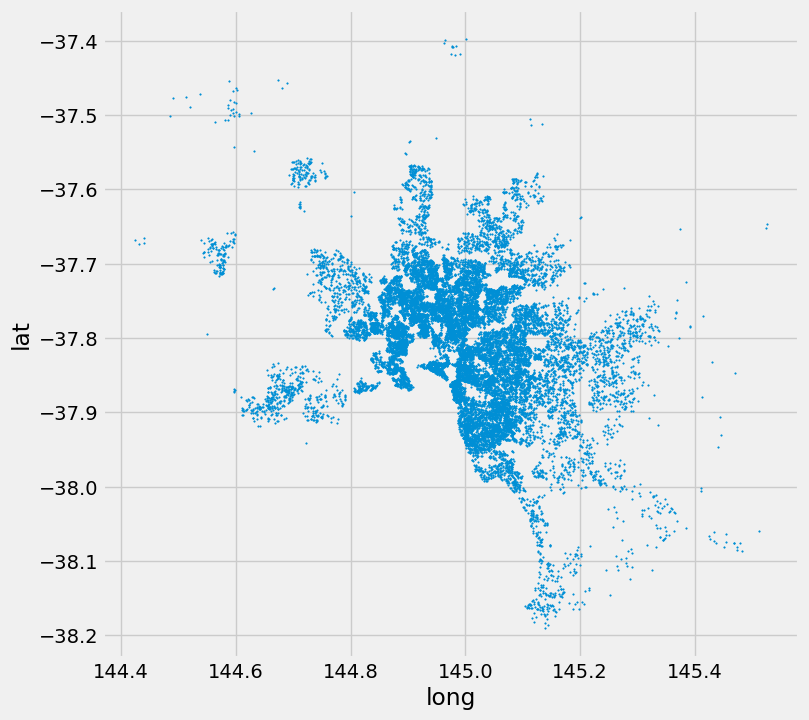

In [36]:
mel.plot(kind='scatter', x='long', y='lat', s=1, figsize=(8, 8));

### 5d) Prepare X matrix by scaling
Why do we need to scale? (thread)

In [37]:
X = mel.loc[:, ['lat', 'long']]
sc = StandardScaler()
X_sc = sc.fit_transform(X)

### 5e) Cluster and plot clusters

In [38]:
km = KMeans(n_clusters=8)
km.fit(X_sc)
mel['cluster'] = km.labels_

<Axes: xlabel='long', ylabel='lat'>

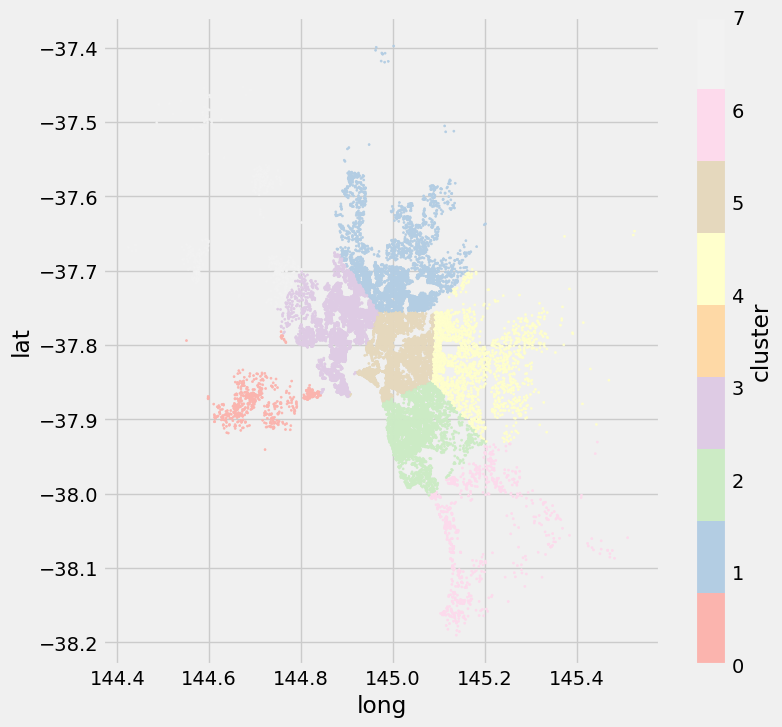

In [42]:
mel.plot(
    kind='scatter',
    x='long',
    y='lat',
    c='cluster',
    colormap='Pastel1',
    s=2,
    figsize=(8, 8)
)

### 5f) Do prices differ by cluster?

In [40]:
mel.groupby('cluster').price.mean()

cluster
0    6.313783e+05
1    7.513425e+05
2    1.359166e+06
3    9.173002e+05
4    1.260669e+06
5    1.368569e+06
6    7.718231e+05
7    5.816627e+05
Name: price, dtype: float64

<Axes: ylabel='cluster'>

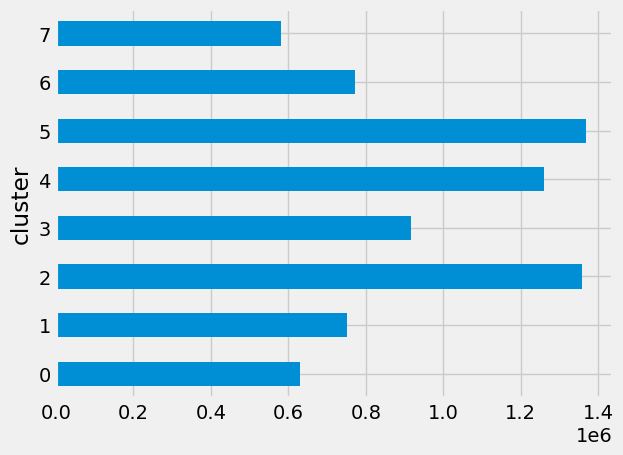

In [45]:
mel.groupby('cluster').price.mean().plot(kind='barh')